In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# implementaion data input and output
# height(cmm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
print(X)

[[147]
 [150]
 [153]
 [158]
 [163]
 [165]
 [168]
 [170]
 [173]
 [175]
 [178]
 [180]
 [183]]


In [13]:
# weight(kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
print(y)

[[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]


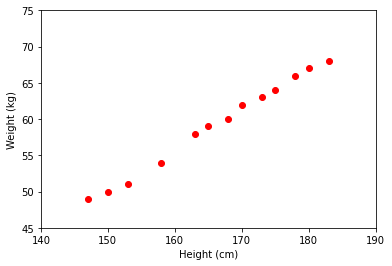

In [16]:
# draw graph - visualize data
# plt.plot(data1, data2, kindofnode)
plt.plot(X,y,'ro')
# plt.axis([raneX, rangeY])
plt.axis([140,190,45,75])

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

=> Weight(kg) = w_1*(height) + w_0


In [17]:
#--------------------------------------------------------------------------

# Matrix dagger - when A non-singular or invertible

In [23]:
# using numpy.linalg.pinv(A) to count dagger matrix
# Building X bar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
print(Xbar)

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [27]:
# caculating weight of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A),b)
print('w= ', w)

w=  [[-33.73541021]
 [  0.55920496]]


In [33]:
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
print(x0)
y0 = w_0 + w_1*x0
print(y0)

-33.73541020578887
0.5592049619395709
[145. 185.]
[47.34930928 69.71750775]


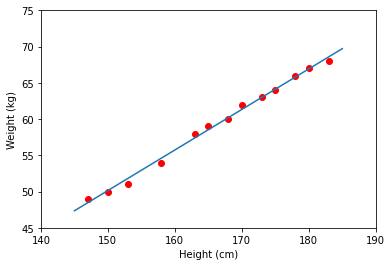

In [29]:
# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [30]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [35]:
#-----------------------------------------------------

# Using scikit-learn

In [36]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
